<a href="https://colab.research.google.com/github/Imirushik/Bank-Marketing-ML/blob/main/Code/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Previewing

In [59]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'  # Update with your file path in Colab
data = pd.read_csv(file_path, sep=';')  # Use `sep=';'` since the dataset uses semicolons
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Analyzing(Check missing values)

In [60]:
# Basic statistics and info
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values
print(data['y'].value_counts())  # Check target class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

# Data Preprocessing

**Encoding Catogerical Values**

In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
print("Encoding categorical features:")
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  # Exclude the target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
        print(f"- Column '{column}' encoded with classes: {le.classes_}")

# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("\nTarget variable 'y' encoded as:")
print(" - 'yes' -> 1")
print(" - 'no'  -> 0")


Encoding categorical features:
- Column 'job' encoded with classes: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
- Column 'marital' encoded with classes: ['divorced' 'married' 'single']
- Column 'education' encoded with classes: ['primary' 'secondary' 'tertiary' 'unknown']
- Column 'default' encoded with classes: ['no' 'yes']
- Column 'housing' encoded with classes: ['no' 'yes']
- Column 'loan' encoded with classes: ['no' 'yes']
- Column 'contact' encoded with classes: ['cellular' 'telephone' 'unknown']
- Column 'month' encoded with classes: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
- Column 'poutcome' encoded with classes: ['failure' 'other' 'success' 'unknown']

Target variable 'y' encoded as:
 - 'yes' -> 1
 - 'no'  -> 0


**Split in to Train & Test**

In [62]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset sizes
print("Dataset split summary:")
print(f"- Total samples: {len(data)}")
print(f"- Training samples: {len(X_train)}")
print(f"- Test samples: {len(X_test)}")

# Verify stratification
print("\nClass distribution in the original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in the test set:")
print(y_test.value_counts(normalize=True))


Dataset split summary:
- Total samples: 45211
- Training samples: 36168
- Test samples: 9043

Class distribution in the original dataset:
y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

Class distribution in the training set:
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Class distribution in the test set:
y
0    0.883003
1    0.116997
Name: proportion, dtype: float64


**Balancing (Using SMOTE)**

In [63]:
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train.value_counts())

# Verify the dataset sizes after SMOTE
print("\nDataset size after SMOTE:")
print(f"- Number of samples in X_train: {len(X_train)}")
print(f"- Number of samples in y_train: {len(y_train)}")


Class distribution before SMOTE:
y
0    31937
1     4231
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class distribution after SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64

Dataset size after SMOTE:
- Number of samples in X_train: 63874
- Number of samples in y_train: 63874


**Outliers Handling & Scaling**

Visualizing outliers with box plots:


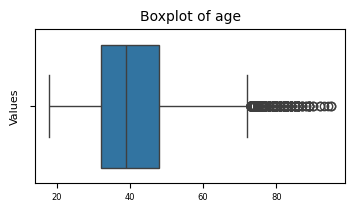

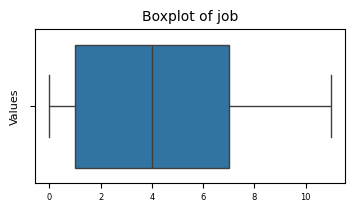

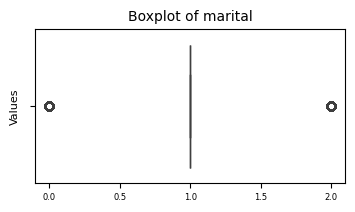

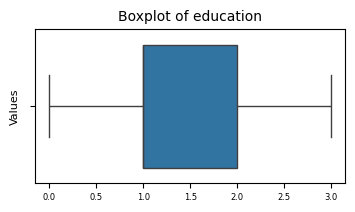

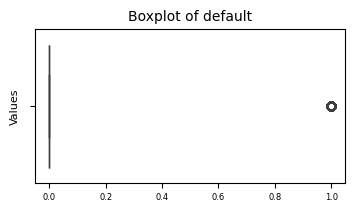

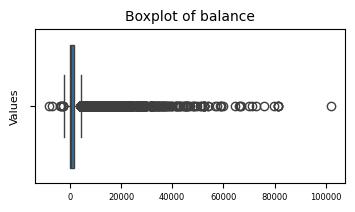

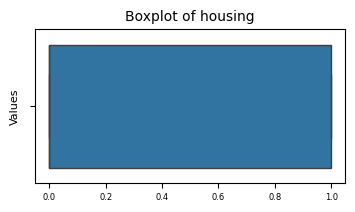

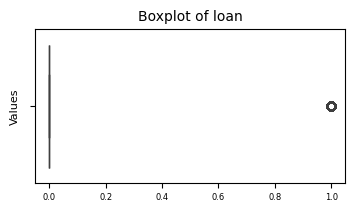

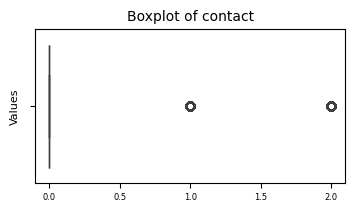

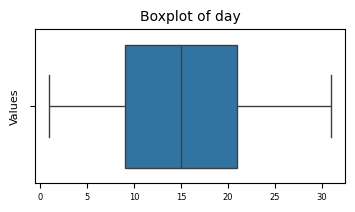

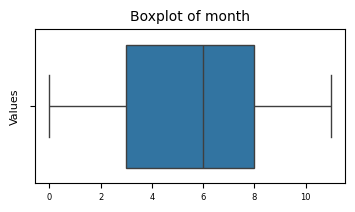

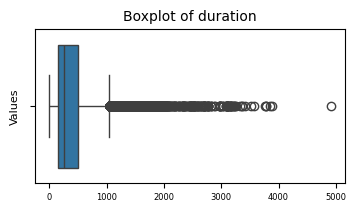

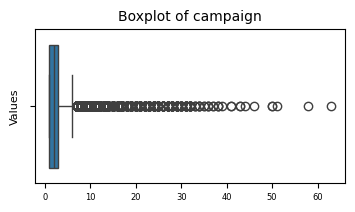

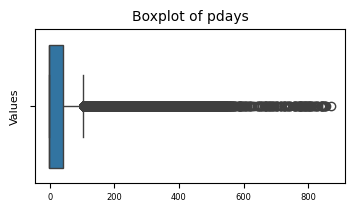

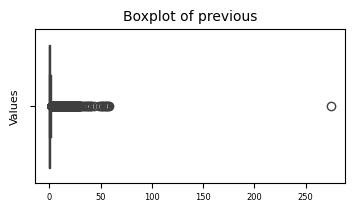

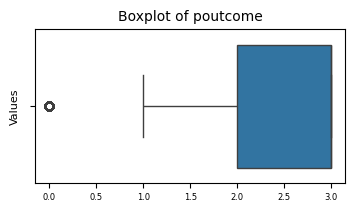


Identifying outliers:
- age: 633 outliers detected
- job: 0 outliers detected
- marital: 23621 outliers detected
- education: 0 outliers detected
- default: 688 outliers detected
- balance: 6059 outliers detected
- housing: 0 outliers detected
- loan: 6155 outliers detected
- contact: 15906 outliers detected
- day: 0 outliers detected
- month: 0 outliers detected
- duration: 3548 outliers detected
- campaign: 2938 outliers detected
- pdays: 11623 outliers detected
- previous: 6527 outliers detected
- poutcome: 7258 outliers detected

Handling outliers (capping and flooring):
- age: Outliers handled by capping and flooring.
- job: Outliers handled by capping and flooring.
- marital: Outliers handled by capping and flooring.
- education: Outliers handled by capping and flooring.
- default: Outliers handled by capping and flooring.
- balance: Outliers handled by capping and flooring.
- housing: Outliers handled by capping and flooring.
- loan: Outliers handled by capping and flooring.
- 

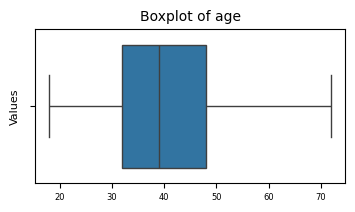

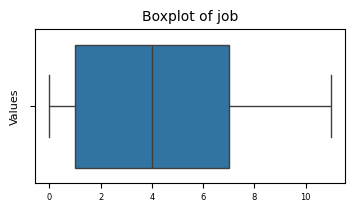

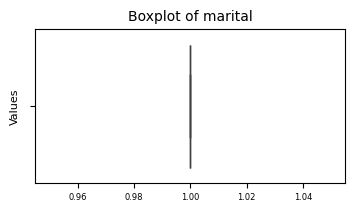

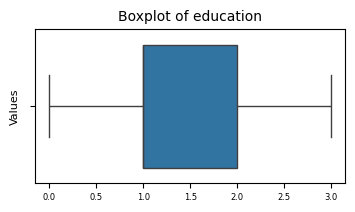

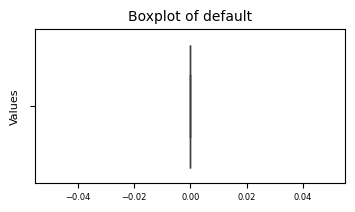

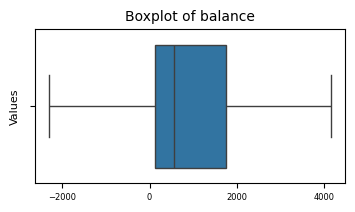

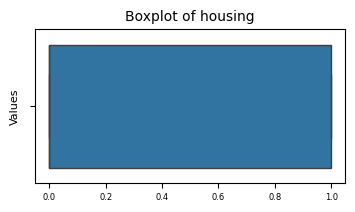

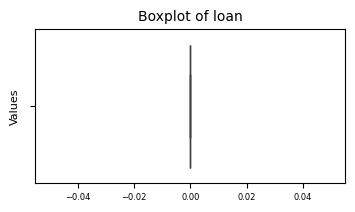

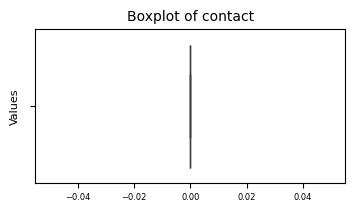

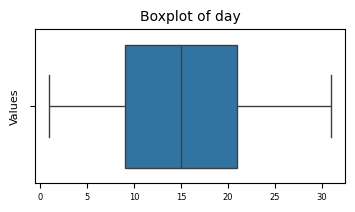

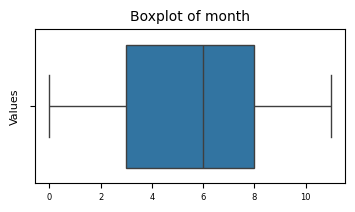

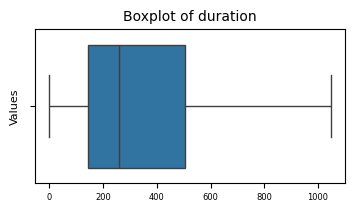

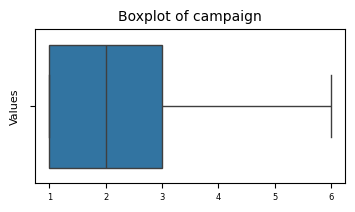

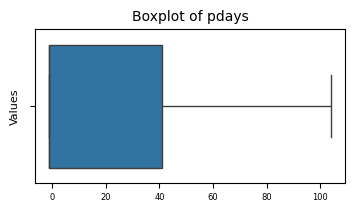

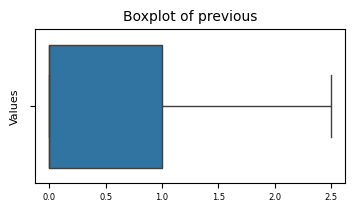

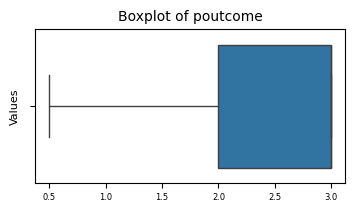


Outliers handled and dataset scaled.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Visualize Outliers using Box Plots
print("Visualizing outliers with box plots:")
numerical_columns = X_train.columns

for column in numerical_columns:
    plt.figure(figsize=(4, 2))  # Smaller figure size
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot of {column}", fontsize=10)  # Smaller title font size
    plt.xlabel('', fontsize=8)  # Remove x-label for minimalism
    plt.ylabel('Values', fontsize=8)  # Smaller y-label font size
    plt.xticks(fontsize=6)  # Smaller x-ticks
    plt.yticks(fontsize=6)  # Smaller y-ticks
    plt.show()

# 2. Identify Outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

print("\nIdentifying outliers:")
for column in numerical_columns:
    outliers = detect_outliers_iqr(X_train, column)
    print(f"- {column}: {len(outliers)} outliers detected")

# 3. Handling Outliers (Capping/Flooring)
print("\nHandling outliers (capping and flooring):")
for column in numerical_columns:
    Q1 = np.percentile(X_train[column], 25)
    Q3 = np.percentile(X_train[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[column] = np.where(X_train[column] < lower_bound, lower_bound, X_train[column])
    X_train[column] = np.where(X_train[column] > upper_bound, upper_bound, X_train[column])
    print(f"- {column}: Outliers handled by capping and flooring.")

# 4. Re-visualize Outliers After Handling
print("\nVisualizing outliers after handling:")
for column in numerical_columns:
    plt.figure(figsize=(4, 2))  # Smaller figure size
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot of {column}", fontsize=10)  # Smaller title font size
    plt.xlabel('', fontsize=8)  # Remove x-label for minimalism
    plt.ylabel('Values', fontsize=8)  # Smaller y-label font size
    plt.xticks(fontsize=6)  # Smaller x-ticks
    plt.yticks(fontsize=6)  # Smaller y-ticks
    plt.show()

# 5. Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nOutliers handled and dataset scaled.")


## **Numerical & Catogerical columns visualization**

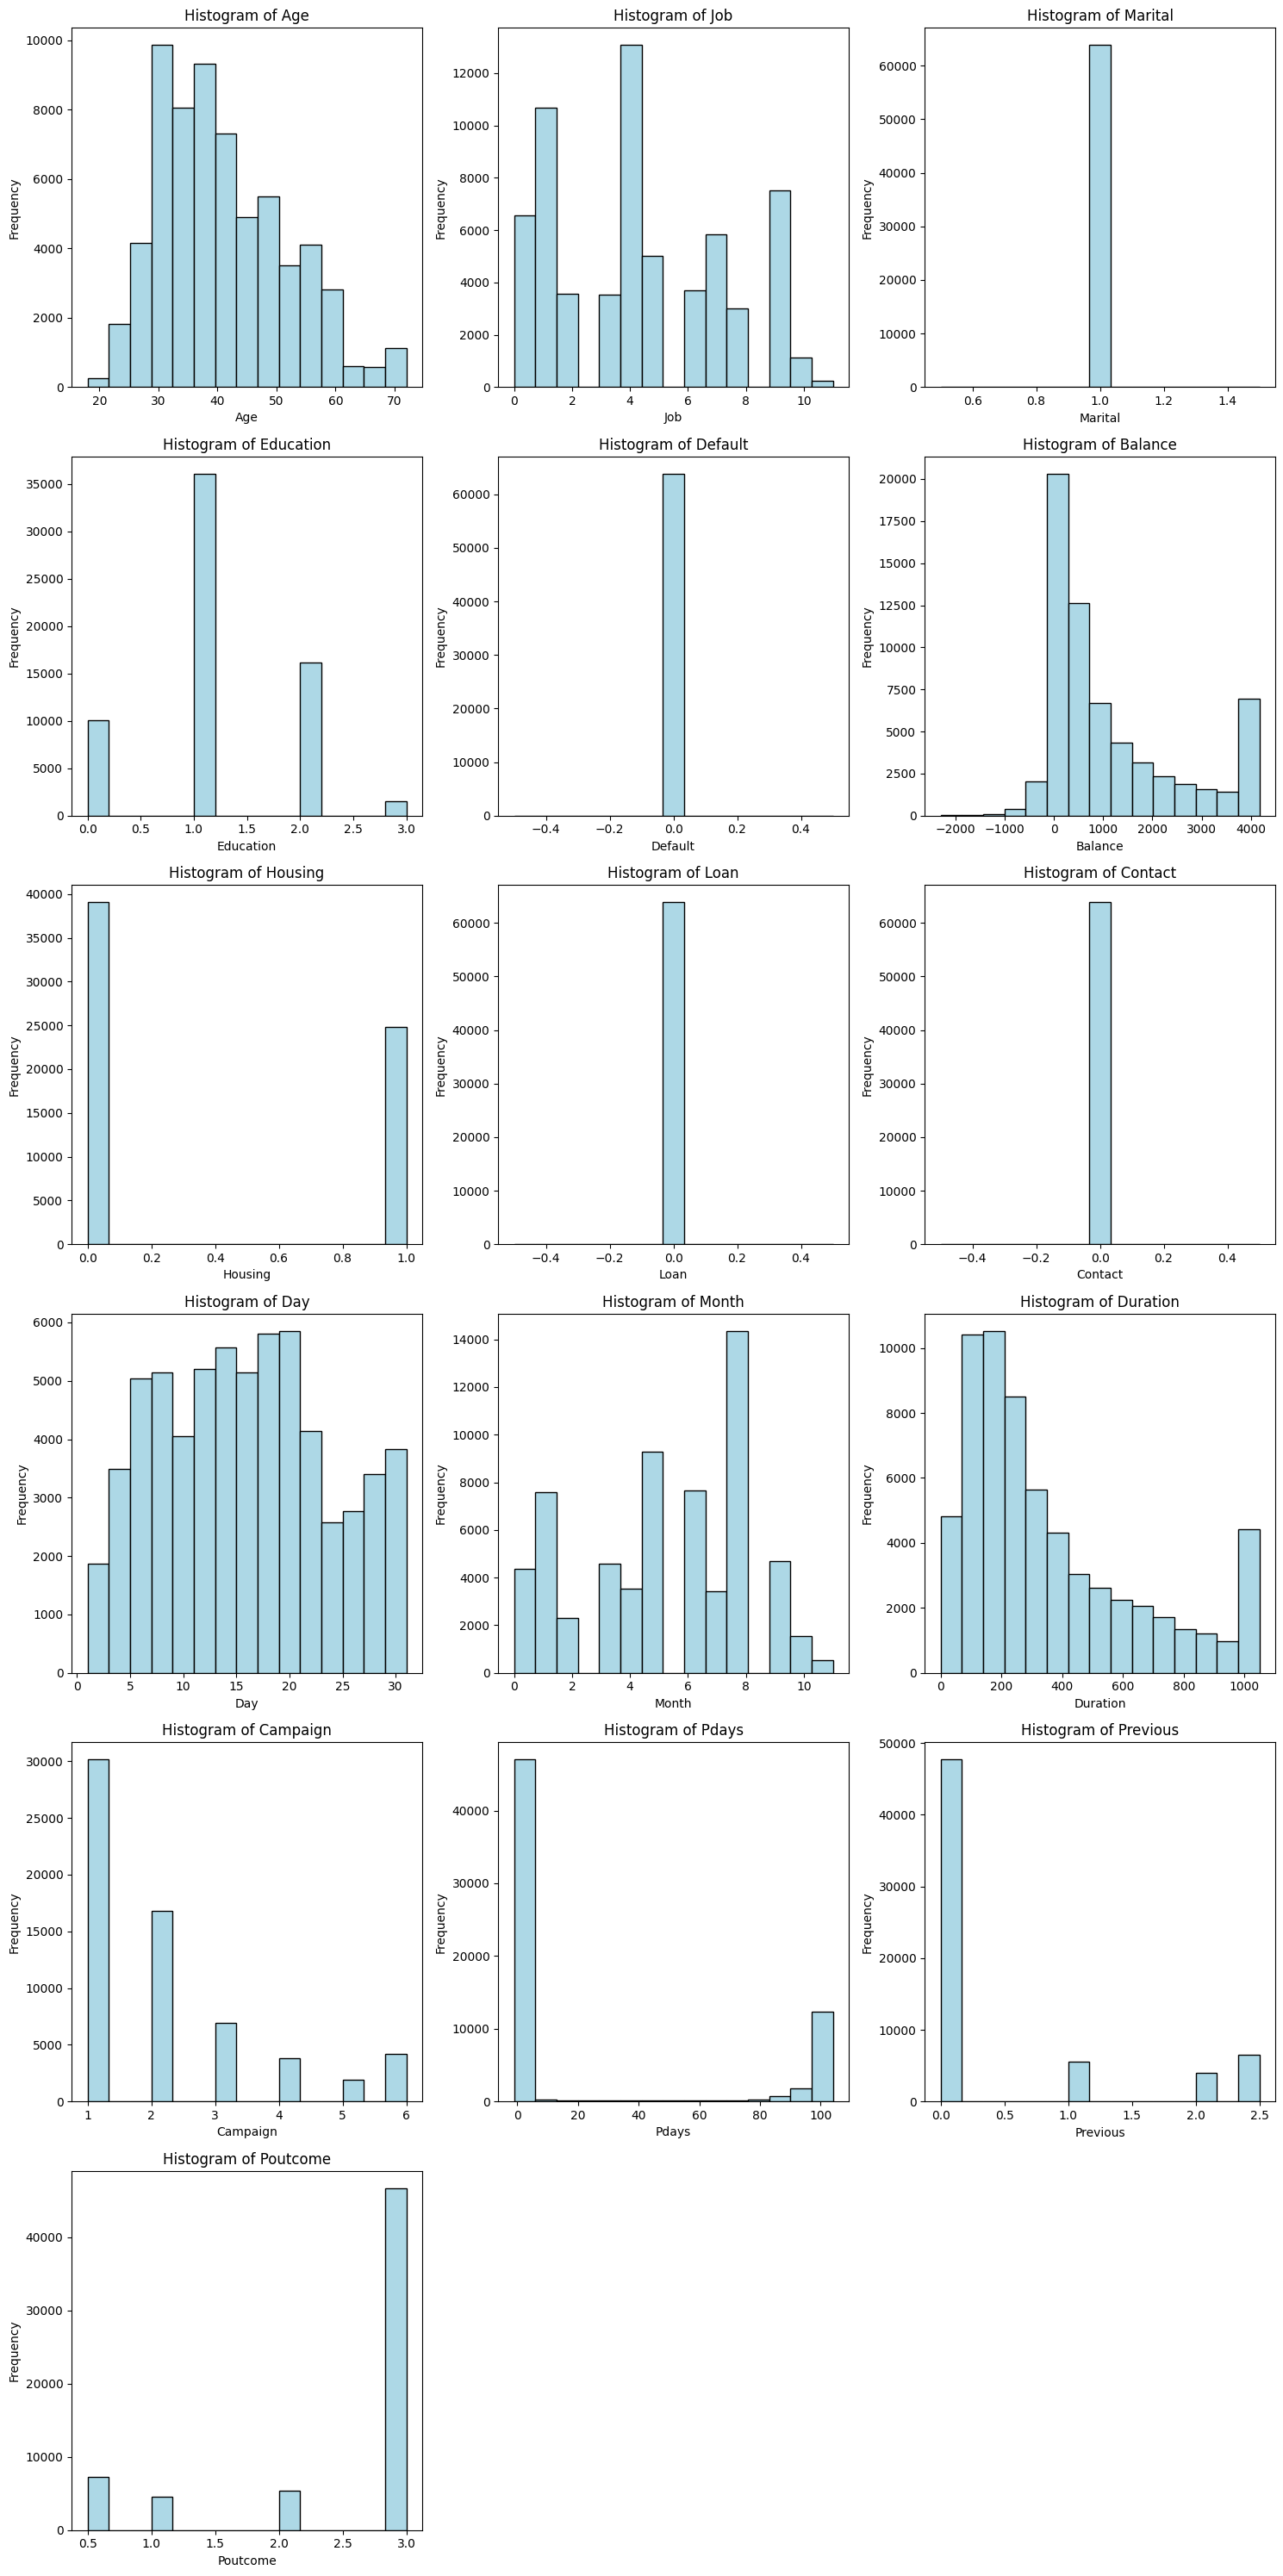

In [65]:
import matplotlib.pyplot as plt
import math

# Function to plot histograms for numerical columns
def plot_numerical_columns(data, numeric_columns):
    # Dynamically calculate rows and columns based on the number of columns
    num_columns = len(numeric_columns)
    rows = math.ceil(num_columns / 3)
    cols = 3  # Fixed to a max of 3 columns per row

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, col in enumerate(numeric_columns):
        axes[i].hist(data[col], bins=15, color='lightblue', edgecolor='black')
        axes[i].set_title(f"Histogram of {col.capitalize()}", fontsize=12)
        axes[i].set_xlabel(f"{col.capitalize()}", fontsize=10)
        axes[i].set_ylabel("Frequency", fontsize=10)

    # Remove empty subplots if grid slots exceed the number of columns
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example Usage
numeric_columns = X_train.columns  # Replace with actual numeric column names
plot_numerical_columns(data=pd.DataFrame(X_train, columns=numeric_columns), numeric_columns=numeric_columns)


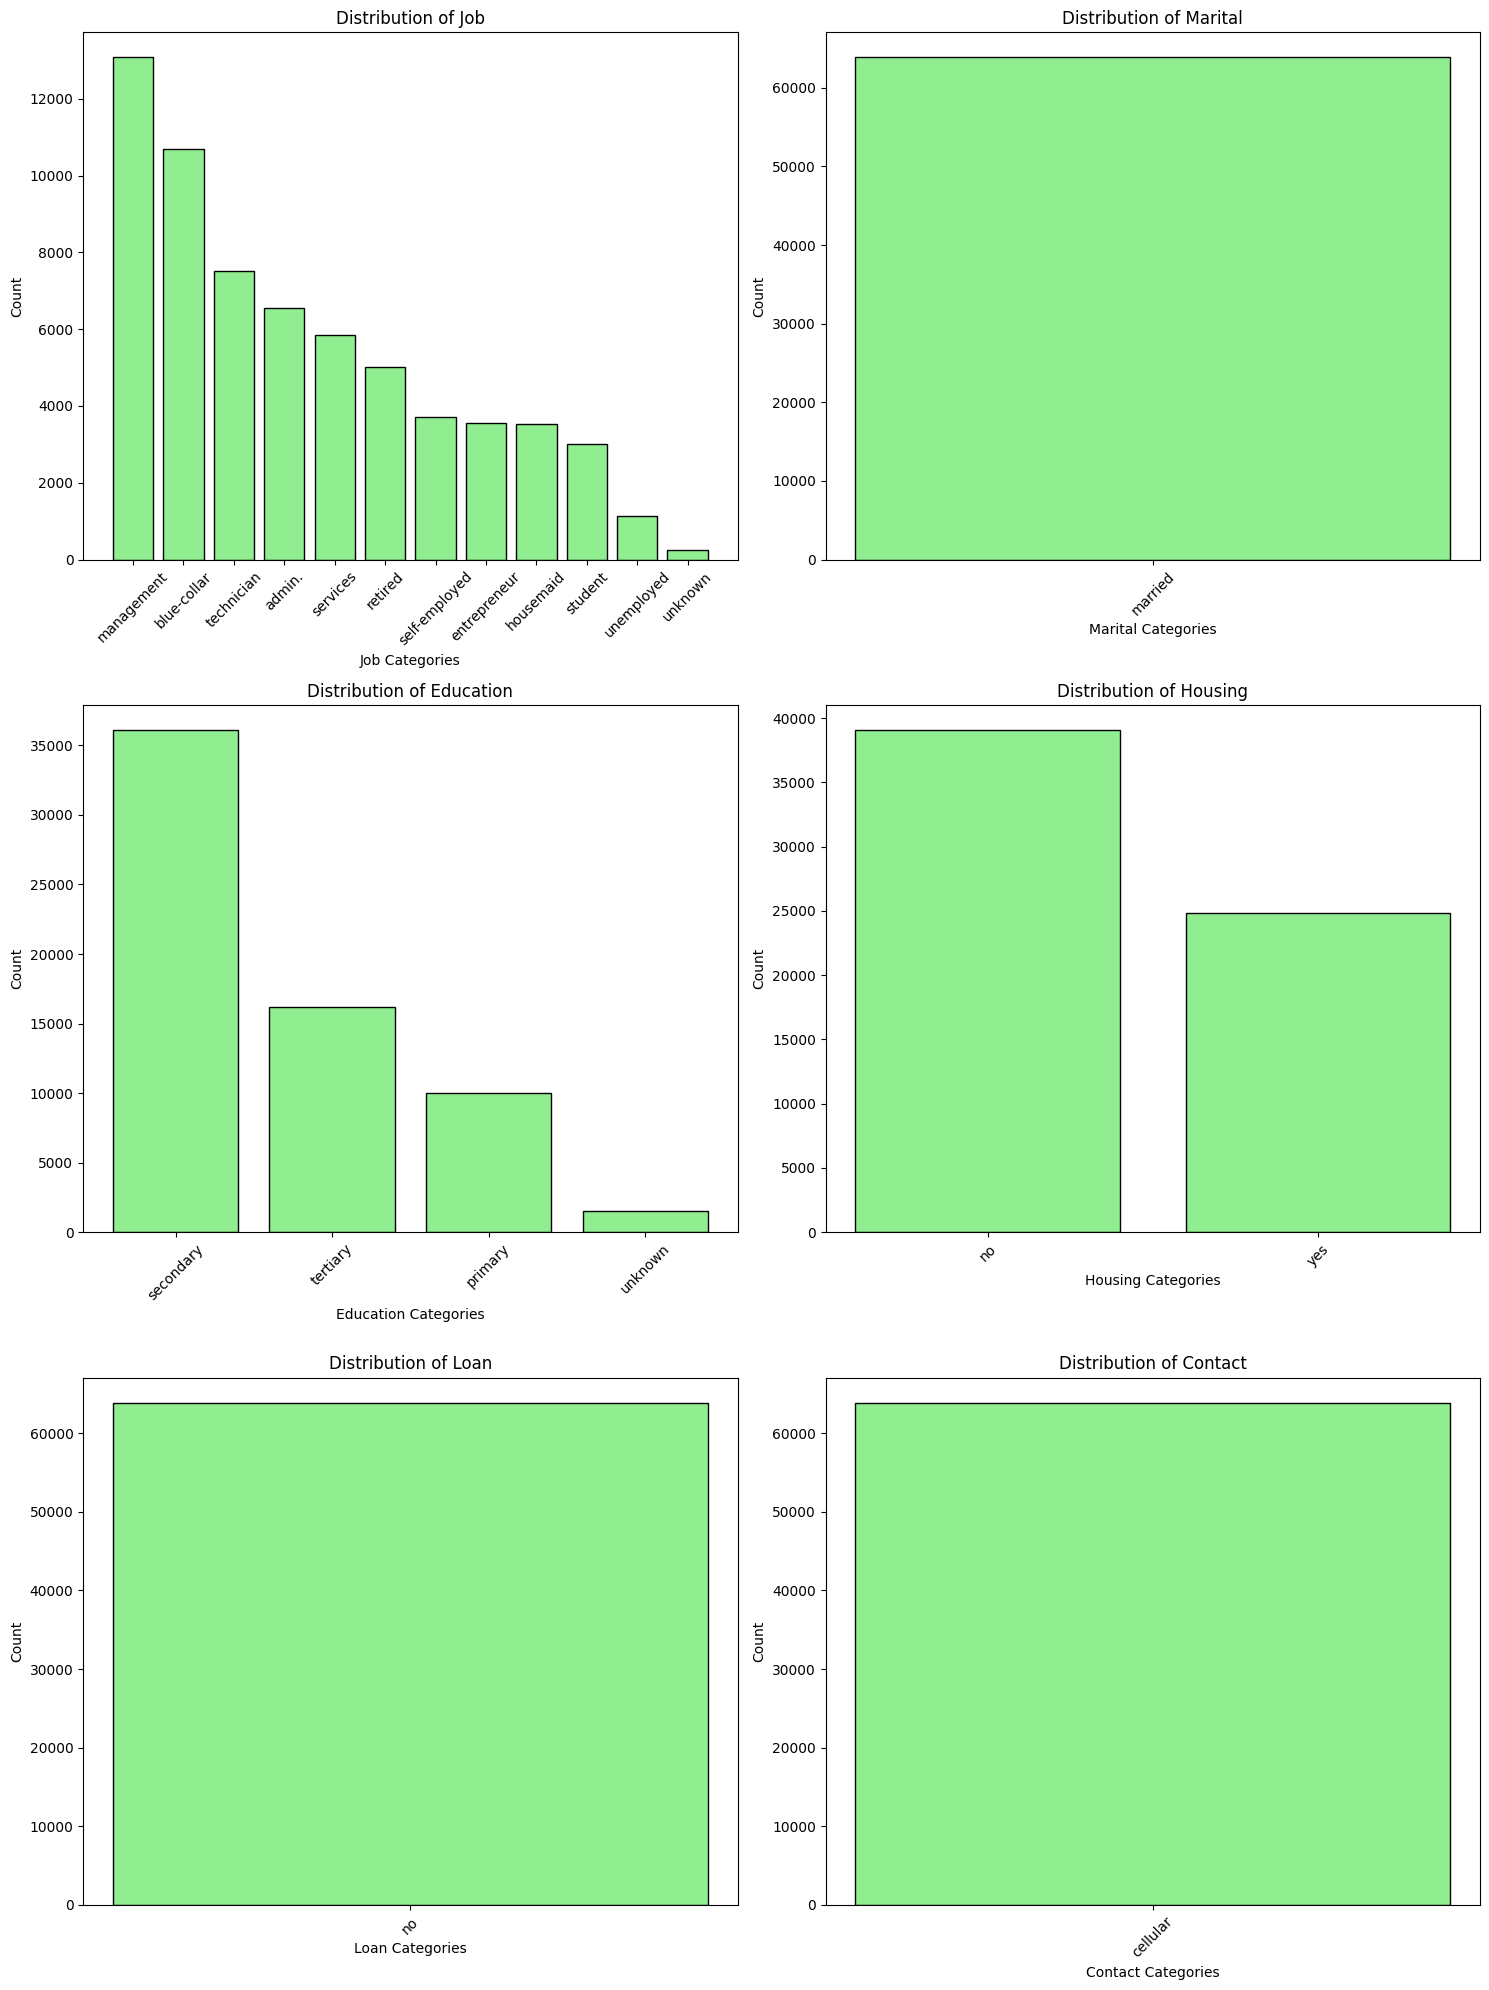

In [66]:
import matplotlib.pyplot as plt

# Function to plot bar charts for categorical columns
def plot_categorical_columns(data, categorical_columns, label_map=None):
    rows, cols = 3, 2  # Define grid layout
    fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        counts = data[col].value_counts()
        labels = counts.index
        values = counts.values

        if label_map and col in label_map:
            # Map encoded values to original categories
            mapped_labels = [f"{label_map[col].get(label, 'unknown')}" for label in labels]
        else:
            mapped_labels = labels

        # Plot bar chart
        axes[i].bar(mapped_labels, values, color='lightgreen', edgecolor='black')
        axes[i].set_title(f"Distribution of {col.capitalize()}", fontsize=12)
        axes[i].set_xlabel(f"{col.capitalize()} Categories", fontsize=10)
        axes[i].set_ylabel("Count", fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example Usage
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact']  # Replace as needed
label_map = {
    'job': {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired',
            6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'},
    'marital': {0: 'divorced', 1: 'married', 2: 'single'},
    'education': {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'},
    'housing': {0: 'no', 1: 'yes'},
    'loan': {0: 'no', 1: 'yes'},
    'contact': {0: 'cellular', 1: 'telephone', 2: 'unknown'},
}

plot_categorical_columns(data=X_train, categorical_columns=categorical_columns, label_map=label_map)


# Model Training

In [67]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8730509786575251
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      7985
           1       0.47      0.66      0.55      1058

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.74      9043
weighted avg       0.90      0.87      0.88      9043

Confusion Matrix for Random Forest:
 [[7196  789]
 [ 359  699]]


In [68]:
# Import necessary libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6665 - loss: 3.8939 - val_accuracy: 0.7899 - val_loss: 0.4406
Epoch 2/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7553 - loss: 1.0872 - val_accuracy: 0.1255 - val_loss: 3.6055
Epoch 3/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7594 - loss: 1.1034 - val_accuracy: 0.3038 - val_loss: 2.7219
Epoch 4/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7764 - loss: 0.7546 - val_accuracy: 0.6490 - val_loss: 0.7833
Epoch 5/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7798 - loss: 0.8379 - val_accuracy: 0.9689 - val_loss: 0.0844
Epoch 6/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7889 - loss: 0.6638 - val_accuracy: 0.7304 - val_loss: 0.5981
Epoch 7/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7959 - loss: 0.5475 - val_accuracy: 0.6301 - val_loss: 0.7347
Epoch 8/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7952 - loss: 0.5782 - val_accurac

# **Evaluation**

In [69]:
# Neural Network Evaluation
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix for Neural Network:\n", confusion_matrix(y_test, y_pred_nn))

# Random Forest Evaluation (already provided in your code above)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Accuracy: 0.8214088245051421
Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      7985
           1       0.37      0.72      0.49      1058

    accuracy                           0.82      9043
   macro avg       0.66      0.78      0.69      9043
weighted avg       0.89      0.82      0.84      9043

Confusion Matrix for Neural Network:
 [[6663 1322]
 [ 293  765]]
Random Forest Accuracy: 0.8730509786575251
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      7985
           1       0.47      0.66      0.55      1058

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.74      9043
weighted avg       0.90      0.87      0.88      9043

Confusion Matrix for Random Forest:
 [[7196  789]
 [ 359  699]]


In [70]:
# Evaluate on training data
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))

# Evaluate on test data (already computed)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.8730509786575251


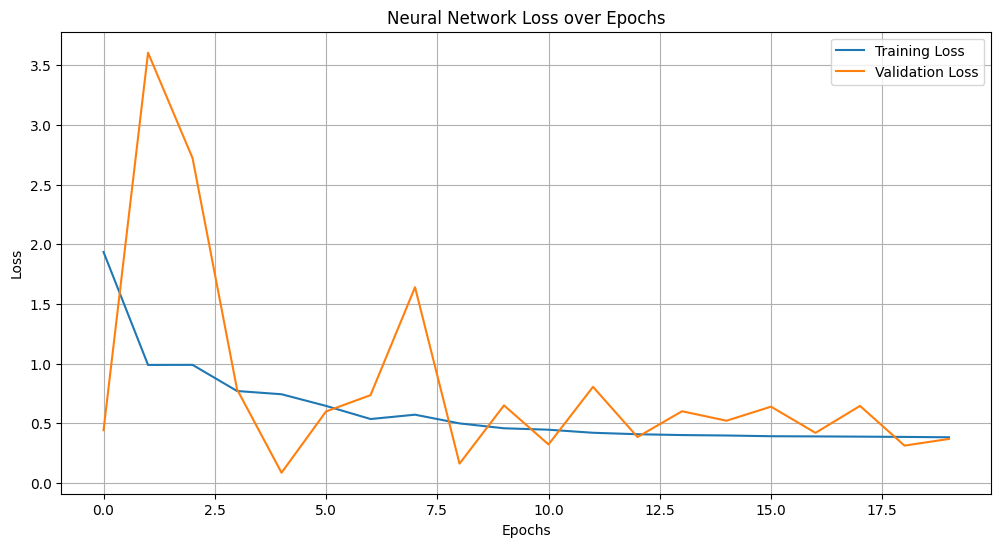

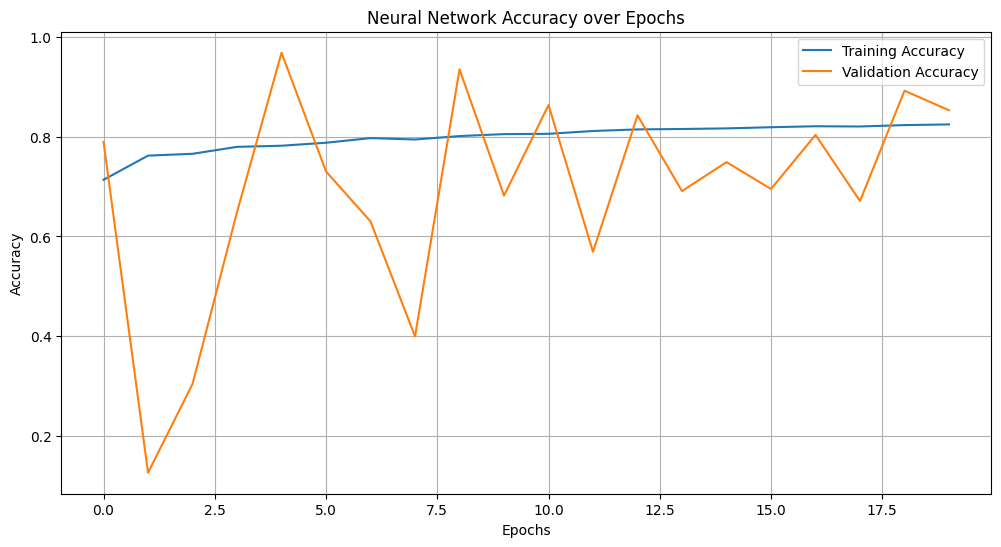

In [71]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy graphs for Neural Network
# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(history_nn.history['loss'], label='Training Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


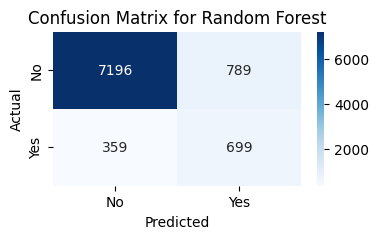

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


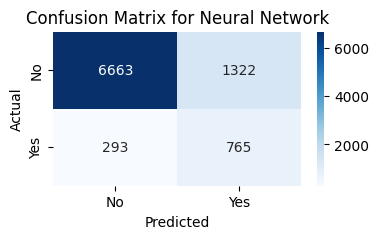

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with the Neural Network model
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary output (0 or 1)

# Generate confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Hyperparameter Tunning

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate on training data
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy (Default):", accuracy_score(y_train, y_pred_rf_train))

# Evaluate on test data
y_pred_rf_test = rf_model.predict(X_test)
print("Random Forest Test Accuracy (Default):", accuracy_score(y_test, y_pred_rf_test))

# Try changing a key parameter (e.g., n_estimators)
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None)
rf_model.fit(X_train, y_train)

# Evaluate again
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy (n_estimators=200):", accuracy_score(y_train, y_pred_rf_train))

y_pred_rf_test = rf_model.predict(X_test)
print("Random Forest Test Accuracy (n_estimators=200):", accuracy_score(y_test, y_pred_rf_test))

# Try another key parameter (e.g., max_depth)
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

# Evaluate again
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy (max_depth=10):", accuracy_score(y_train, y_pred_rf_train))

y_pred_rf_test = rf_model.predict(X_test)
print("Random Forest Test Accuracy (max_depth=10):", accuracy_score(y_test, y_pred_rf_test))


Random Forest Training Accuracy (Default): 1.0
Random Forest Test Accuracy (Default): 0.8730509786575251
Random Forest Training Accuracy (n_estimators=200): 1.0
Random Forest Test Accuracy (n_estimators=200): 0.8740462235983634
Random Forest Training Accuracy (max_depth=10): 0.8951842690296521
Random Forest Test Accuracy (max_depth=10): 0.8306977772862988


Training Accuracy: 0.8951842690296521
Test Accuracy: 0.8306977772862988
The model is not overfitting.


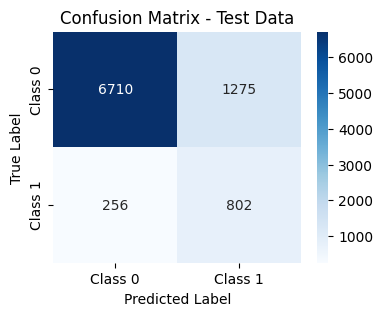

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameter-tuned Random Forest Model (e.g., n_estimators=200, max_depth=10)
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

# Random Forest predictions on training data
y_pred_rf_train = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_rf_train)
print(f"Training Accuracy: {train_accuracy}")

# Random Forest predictions on test data
y_pred_rf_test = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf_test)
print(f"Test Accuracy: {test_accuracy}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Adjust the threshold if needed
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

# Confusion Matrix for test data
cm_test = confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [77]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)
# X, y should be your input data and target labels respectively
# For demonstration purposes, we use random data
X = np.random.rand(10000, 20)  # Example feature data (10,000 samples, 20 features)
y = np.random.randint(2, size=10000)  # Example binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use only a subset of the data for quicker tuning (adjust the size to fit your needs)
X_train_sub = X_train[:1000]  # Use first 1000 samples
y_train_sub = y_train[:1000]

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train_sub.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Implement Early Stopping (to stop training early if validation accuracy doesn't improve)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
history_nn = model_nn.fit(X_train_sub, y_train_sub, epochs=10, batch_size=32,
                          validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Optionally, you can predict and evaluate accuracy as follows:
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import accuracy_score
print("Neural Network Test Accuracy:", accuracy_score(y_test, y_pred_nn))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4887 - loss: 0.7173 - val_accuracy: 0.5200 - val_loss: 0.6970
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5165 - loss: 0.6930 - val_accuracy: 0.5100 - val_loss: 0.6914
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5238 - loss: 0.6911 - val_accuracy: 0.5250 - val_loss: 0.6933
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.6878 - val_accuracy: 0.5100 - val_loss: 0.6946
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 0.6848 - val_accuracy: 0.5350 - val_loss: 0.6928
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5114 - loss: 0.6946
Test Accuracy: 0.5184999704360962
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Test Accuracy: 0.5185


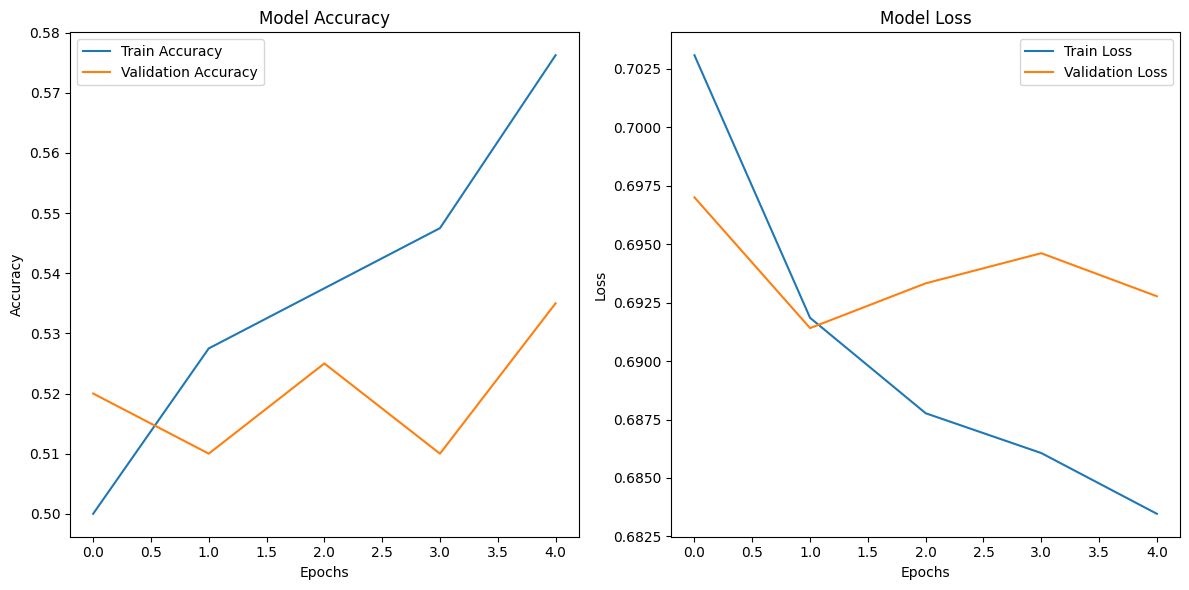

In [78]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


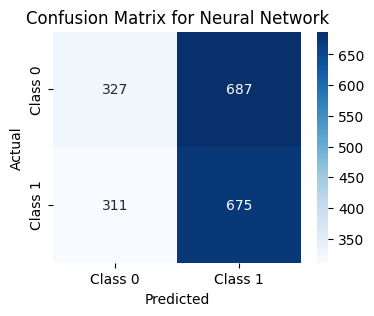

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()
